<a href="https://colab.research.google.com/github/DanielZafra4/Proyecto_Final_Zafra_DS1/blob/main/Proyecto_Final_Zafra_Daniel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análisis Car Accident Dataset**

##**1. Descripción de la temática**

El presente proyecto tiene como objetivo analizar un dataset detallado sobre accidentes de automóviles ocurridos en un área urbana durante enero de 2021. Este conjunto de datos extraido de la plataforma ***Kaggle (***https://www.kaggle.com/datasets/nextmillionaire/car-accident-dataset)
 incluye información clave, como la fecha y el día de la semana en que ocurrieron los accidentes, el tipo de control en intersecciones, la gravedad de los accidentes, entre otros.

El análisis se realiza con el propósito de identificar patrones significativos en los accidentes viales, con especial énfasis en comprender los factores que los provocan y aumentan su severidad. Los resultados servirán como base para diseñar estrategias de prevención y mejora en la seguridad vial, buscando reducir la ocurrencia de accidentes y mitigar su impacto.

Específicamente, este análisis busca:


*   **Detectar puntos críticos y horarios de mayor incidencia:** Analizando la distribución geográfica y temporal de los accidentes para identificar zonas de alto riesgo y momentos del día con mayor frecuencia de incidentes.

*  **Evaluar el impacto de factores ambientales y estructurales:** Estudiando cómo las condiciones climáticas, de iluminación y de diseño vial contribuyen a la ocurrencia de accidentes.

*   **Relacionar la gravedad de los accidentes con factores humanos y vehiculares:** Explorando datos sobre vehículos involucrados y su interacción con las condiciones del entorno para entender mejor las causas de accidentes graves.

*   **Proponer medidas preventivas basadas en evidencia:** Desarrollando recomendaciones específicas, como mejoras en el diseño de intersecciones, gestión de tráfico en horarios críticos, campañas de concienciación y adaptaciones en las infraestructuras.

La relevancia de este análisis radica en su potencial para salvar vidas al contribuir al diseño de políticas públicas, intervenciones urbanas y programas de concienciación más efectivos. Al entender mejor los patrones detrás de los accidentes, se pueden establecer estrategias proactivas para minimizar los riesgos y garantizar una movilidad más segura para todos los usuarios de la vía.



##**2. Carga del dataset desde la URL**

En esta ocasión importamos el archivo desde el repositorio de GitHub especificando el raw corresponidente al archivo *Car.csv*, tambien importamos las librerías que vamos a necesitar.

###**Librerías**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import confusion_matrix

Se carga el dataset desde un archivo CSV alojado en un repositorio de GitHub.

###**DataSet**

In [3]:
url = 'https://raw.githubusercontent.com/DanielZafra4/Pre_entrega1/refs/heads/main/Car.csv'
data = pd.read_csv(url, index_col=0,  sep=";")
data.head(10)

,Accident Date,Day of Week,Accident Severity,Latitude,Longitude,Light Conditions,District,Number of Casualties,Number of Vehicles,Police Force,Road Surface Conditions,Road Type,Speed limit,Time,Area,Weather Conditions,Vehicle Type
Index,,,,,,,,,,,,,,,,,
1,01/01/2021,Thursday,Serious,51.512.273,-0.201349,Daylight,Kensington and Chelsea,1,2,Metropolitan Police,Dry,One way street,30,15:11:00,Urban,Fine no high winds,Car
2,01/01/2021,Thursday,Slight,51.493.415,-0.185525,Daylight,Kensington and Chelsea,3,2,Metropolitan Police,Dry,Single carriageway,30,11:48:00,Urban,Fine no high winds,Car
3,01/01/2021,Thursday,Serious,51.523.932,-0.15303,Darkness - lights lit,Westminster,1,2,Metropolitan Police,Dry,Single carriageway,30,17:30:00,Urban,Fine no high winds,Motorcycle
4,01/01/2021,Thursday,Slight,51.514.015,-0.151413,Daylight,Westminster,2,2,Metropolitan Police,Wet or damp,Single carriageway,30,9:01:00,Urban,Raining no high winds,Car
5,01/01/2021,Thursday,Serious,51.543.017,-0.137258,Daylight,Camden,1,1,Metropolitan Police,Dry,Dual carriageway,30,5:29:00,Urban,Fine no high winds,Car
6,01/01/2021,Thursday,Slight,51.503.254,-0.223174,Darkness - lights lit,Hammersmith and Fulham,1,1,Metropolitan Police,Dry,One way street,30,2:40:00,Urban,Fine no high winds,Motorcycle
7,01/01/2021,Thursday,Slight,51.563.718,-0.060663,Darkness - lights lit,Hackney,1,2,Metropolitan Police,Dry,Single carriageway,30,21:23:00,Urban,Fine no high winds,Car
8,01/01/2021,Thursday,Slight,51.540.314,-0.070167,Darkness - lights lit,Hackney,1,1,Metropolitan Police,Dry,Single carriageway,30,22:25:00,Urban,Fine no high winds,Car
9,01/01/2021,Thursday,Serious,51.520.825,-0.071712,Daylight,Tower Hamlets,1,1,Metropolitan Police,Dry,One way street,30,3:44:00,Urban,Fine no high winds,Bus


##**3. Análisis exploratorio de datos (EDA)**



Este paso ayuda a comprender la estructura del dataset, la cantidad de valores nulos y cómo están distribuidas las clases en la variable objetivo **(Accident Severity)**.

In [4]:
# Información general del dataset
print("Información del dataset:")
print(data.info())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 119964 entries, 1 to 122977
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Accident Date            119964 non-null  object
 1   Day of Week              119964 non-null  object
 2   Accident Severity        119964 non-null  object
 3   Latitude                 119964 non-null  object
 4   Longitude                119964 non-null  object
 5   Light Conditions         119964 non-null  object
 6   District                 119964 non-null  object
 7   Number of Casualties     119964 non-null  int64 
 8   Number of Vehicles       119964 non-null  int64 
 9   Police Force             119964 non-null  object
 10  Road Surface Conditions  119964 non-null  object
 11  Road Type                119964 non-null  object
 12  Speed limit              119964 non-null  int64 
 13  Time                     119964 non-null  object
 14  

In [5]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(data.describe())


Estadísticas descriptivas:
       Number of Casualties  Number of Vehicles    Speed limit
count         119964.000000       119964.000000  119964.000000
mean               1.353173            1.828832      38.922343
std                0.798187            0.708554      14.056950
min                1.000000            1.000000      15.000000
25%                1.000000            1.000000      30.000000
50%                1.000000            2.000000      30.000000
75%                1.000000            2.000000      50.000000
max               26.000000           14.000000      70.000000


In [6]:
# Verificar valores nulos
print("\nValores nulos por columna:")
print(data.isnull().sum())


Valores nulos por columna:
Accident Date              0
Day of Week                0
Accident Severity          0
Latitude                   0
Longitude                  0
Light Conditions           0
District                   0
Number of Casualties       0
Number of Vehicles         0
Police Force               0
Road Surface Conditions    0
Road Type                  0
Speed limit                0
Time                       0
Area                       0
Weather Conditions         0
Vehicle Type               0
dtype: int64


Se puede observar que no posee valores nulos

In [7]:
# Distribución de la variable objetivo (Accident Severity)
print("\nDistribución de la variable objetivo:")
print(data['Accident Severity'].value_counts())


Distribución de la variable objetivo:
Accident Severity
Slight     102552
Serious     15842
Fatal        1570
Name: count, dtype: int64


In [8]:
data.shape

(119964, 17)

In [9]:
data.columns = data.columns.str.strip()
data.columns

Index(['Accident Date', 'Day of Week', 'Accident Severity', 'Latitude',
       'Longitude', 'Light Conditions', 'District', 'Number of Casualties',
       'Number of Vehicles', 'Police Force', 'Road Surface Conditions',
       'Road Type', 'Speed limit', 'Time', 'Area', 'Weather Conditions',
       'Vehicle Type'],
      dtype='object')

##**4. Descripción de las columnas**


1.   **Index:** Identificador único para cada registro de accidente, usado para referencia y organización de los datos.

2.   **Accident Date:** Fecha exacta en la que ocurrió el accidente, útil para analizar patrones temporales como tendencias diarias, semanales o estacionales.

3.   **Day of Week:** Día de la semana en el que ocurrió el accidente, permite identificar si ciertos días tienen mayor incidencia de accidentes.

4.   **Accident Severity:** Nivel de gravedad del accidente con los siguientes valores:

  *   **Slight:** Lesiones menores.
  *   **Serious:** Lesiones graves que requieren atención médica significativa.
  *   **Fatal:** Accidentes con al menos una víctima mortal.

5.   **Latitude y Longitude:** Coordenadas geográficas del lugar del accidente, útiles para identificar puntos críticos (hotspots) en mapas.

6.   **Light Conditions:** Condiciones de iluminación en el momento del accidente, con los siguientes valores:

  *   **Daylight:** Luz del día.
  *   **Darkness - lights lit:** Oscuridad con luces encendidas.
  *   **Darkness - no lighting:** Oscuridad sin iluminación.
  *   **Darkness - lights unlit:** Oscuridad con luces apagadas.
  *   **Darkness - lighting unknown:** Oscuridad con iluminación desconocida.

7.   **District:** Distrito donde ocurrió el accidente, proporciona información sobre la ubicación administrativa.

8.   **Number of Casualties:** Número total de víctimas (lesionadas o fallecidas) en el accidente.

9.   **Number of Vehicles:** Número de vehículos involucrados en el accidente.

10.   **Police Force:**  Identificación de la unidad policial responsable del área donde ocurrió el accidente.

11.   **Road Surface Conditions:** Condición de la superficie de la carretera, con los siguientes valores:

  *   **Dry:** Seco.
  *   **Wet or damp:** Mojado o húmedo.
  *   **Frost or ice:** Congelado o con hielo.
  *   **Snow:** Nieve.
  *   **Flood over 3cm. deep:** Inundación mayor a 3 cm de profundidad.

12.   **Road Type:** Tipo de carretera donde ocurrió el accidente, con los siguientes valores:

  *   **One way street:** Calle de un solo sentido.
  *   **Single carriageway:** Carretera de un solo carril.
  *   **Dual carriageway:** Carretera de doble carril.
  *   **Roundabout:** Rotonda.
  *   **Slip road:** Rampa de incorporación o salida.

13.   **Speed Limit:**  Límite de velocidad permitido en la zona del accidente.

14.   **Time:** Hora del día en la que ocurrió el accidente, importante para analizar patrones horarios.

15.   **Area:** Clasificación del área donde ocurrió el accidente:

  *   **Urban:** Zona urbana.
  *   **Rural:** Zona rural.

16.   **Weather Conditions:** Condiciones climáticas en el momento del accidente, con los siguientes valores:

  *   **Fine no high winds:** Clima despejado, sin vientos fuertes.
  *   **Raining no high winds:** Lluvia sin vientos fuertes.
  *   **Fog or mist:** Niebla o neblina.
  *   **Raining + high winds:** Lluvia con vientos fuertes.
  *   **Fine + high winds:** Clima despejado con vientos fuertes.
  *   **Snowing no high winds:** Nevando sin vientos fuertes.
  *   **Snowing + high winds:** Nevando con vientos fuertes.
  *   **Other:** Otras condiciones climáticas.

17.   **Vehicle Type:** Tipo de vehículo involucrado, con los siguientes valores:

  *   **Car:** Automóvil.
  *   **Motorcycle:** Motocicleta.
  *   **Bus:** Autobús.
  *   **Heavy Truck:** Camión pesado.
  *   **Minibus:** Minibús.
  *   **Taxi:** Taxi.
  *   **Other vehicle:** Otro tipo de vehículo.
  *   **Agricultural vehicle:** Vehículo agrícola.
  *   **Pedal cycle:** Bicicleta.
  *   **Ridden horse:** Caballo montado.


## **5. Preprocesamiento de datos**

Preparamos los datos para el entrenamiento de los modelos.

###**5.1. Codificación de variables categóricas**

Se eliminan las columnas que no aportan valor al modelo.

In [10]:
# Eliminar columnas irrelevantes
data.drop(columns=['Accident Date', 'Index', 'Police Force','Latitude','Longitude','Time', 'District'], errors='ignore', inplace=True)

Convertimos las variables categóricas en numéricas usando LabelEncoder.

In [11]:
# Codificar variables categóricas
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Mostrar las primeras filas después de la codificación
print(data.head())

       Day of Week  Accident Severity  Light Conditions  Number of Casualties  \
Index                                                                           
1                4                  1                 4                     1   
2                4                  2                 4                     3   
3                4                  1                 1                     1   
4                4                  2                 4                     2   
5                4                  1                 4                     1   

       Number of Vehicles  Road Surface Conditions  Road Type  Speed limit  \
Index                                                                        
1                       2                        0          1           30   
2                       2                        0          3           30   
3                       2                        0          3           30   
4                       2                 

###**5.2. Separación de características (X) y variable objetivo (y)**

In [12]:
# Separar características (X) y variable objetivo (y)
X = data.drop(columns=['Accident Severity'])
y = data['Accident Severity']

**X:**  Contiene las características predictoras.
  *   Day of Week
  *   Light Conditions
  *   Number of Casualties
  *   Number of Vehicles
  *   Road Surface Conditions
  *   Road Type
  *   Speed Limit
  *   Area
  *   Weather Conditions
  *   Vehicle Type

**y:** Contiene la variable objetivo **(Accident Severity)**.

###**5.3. Normalización de características**

Se normalizan los datos usando StandardScaler para mejorar el rendimiento del modelo.

In [13]:
# Normalización de características
scaler = StandardScaler()
X = scaler.fit_transform(X)

##**6. División del dataset**

Se dividen los datos en 80% para entrenamiento y 20% para prueba.

In [14]:
# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##**7. Entrenamiento y evaluación de modelos**

Ahora entrenaremos y evaluaremos tres modelos de clasificación: **Árbol de Decisión, KNN y Random Forest**, con el objetivo de identificar cuál ofrece el mejor desempeño en la clasificación de la severidad de los accidentes de tránsito.

###**7.1. Árbol de Decisión**



A continuación creamos un modelo de Árbol de Decisión y lo entrenamos con los datos de entrenamiento.

In [15]:
# Entrenar el modelo
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Realizamos predicciones en el conjunto de prueba y se calculan las métricas de rendimiento.

In [16]:
# Predecir en el conjunto de prueba
y_pred_tree = tree_model.predict(X_test)

In [17]:
# Métricas de evaluación
print("Árbol de Decisión:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_tree, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_tree, average='weighted'))

Árbol de Decisión:
Accuracy: 0.8178218647105405
Precision: 0.7574116611232099
Recall: 0.8178218647105405
F1-Score: 0.7826519219327854


Se genera la matriz de confusión para analizar el desempeño del modelo en cada categoría.

Matriz de confusión:
 [[    7    34   229]
 [   38   211  2964]
 [  116   990 19404]]


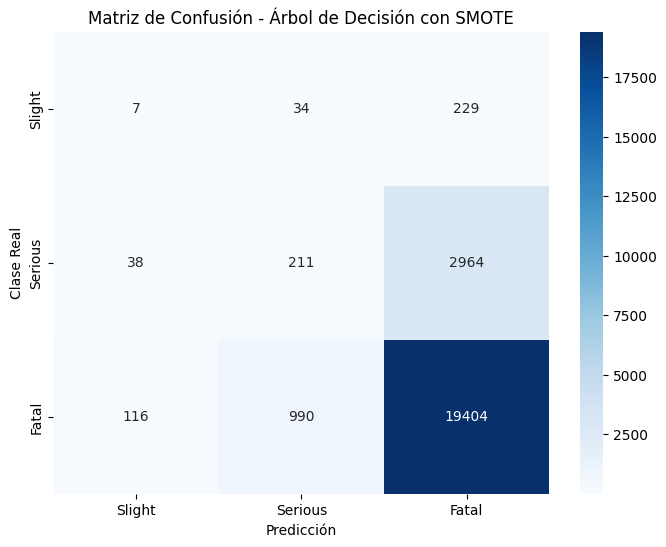

In [18]:
# Matriz de confusión
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print("Matriz de confusión:\n", conf_matrix_tree)

# Definir etiquetas de clases reales
class_labels = ["Slight", "Serious", "Fatal"]

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree , annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Personalizar el gráfico
plt.xlabel("Predicción")
plt.ylabel("Clase Real")
plt.title("Matriz de Confusión - Árbol de Decisión con SMOTE")
plt.show()

####**Evaluación del Modelo de Árbol de Decisión**

Tras entrenar un modelo de Árbol de Decisión para predecir la gravedad de los accidentes de tráfico, se obtuvieron los siguientes resultados en el conjunto de prueba:



*   **Precisión Global (Accuracy):** 81.78%
*   **Precisión por Clase (Precision):** 75.74%
*   **Cobertura (Recall):** 81.78%
*   **F1-Score:** 78.26%

Estos valores indican que el modelo tiene un buen desempeño general, logrando clasificar correctamente más del 80% de los casos. Sin embargo, la menor precisión sugiere que puede haber confusión entre ciertas clases, lo que podría reflejar un desbalance en los datos o la necesidad de optimizar los hiperparámetros del modelo.

Ahora, al interpretar la matriz de confisión, cada fila representa los valores reales y cada columna representa las predicciones del modelo. Es decir:

**Fila 1:** Accidentes que en realidad fueron leves (Slight).
  *   7 fueron correctamente clasificados como leves.
  *   34 fueron mal clasificados como graves.
  *   229 fueron mal clasificados como fatales.

**Fila 2:** Accidentes que en realidad fueron graves (Serious).

  *   38 fueron mal clasificados como leves.
  *   211 fueron correctamente clasificados como graves.
  *   2964 fueron mal clasificados como fatales.

**Fila 3:** Accidentes que en realidad fueron fatales (Fatal).

  *   116 fueron mal clasificados como leves.
  *   990 fueron mal clasificados como graves.
  *   19,404 fueron correctamente clasificados como fatales.

**Principales Observaciones**



1.   El modelo tiene problemas diferenciando accidentes leves y graves:
  *   La mayoría de los accidentes leves (Slight) se están clasificando erróneamente como fatales (229 casos).
  *   También hay 2964 accidentes graves (Serious) que el modelo predice erróneamente como fatales.

2.   El modelo tiene un sesgo hacia la clase "Fatal":
  *   19,404 accidentes fatales fueron correctamente clasificados, lo que es un buen resultado.
  *   Sin embargo, un gran número de accidentes leves y graves se están agrupando como fatales, lo que podría significar un desbalance en los datos o que el modelo prioriza más los accidentes más severos.

3.   Las clases "Slight" y "Serious" tienen bajos valores en la diagonal principal:
  *   La cantidad de predicciones correctas en estas clases es baja, lo que sugiere que el modelo no logra aprender bien las diferencias entre estas categorías.

La evaluación del modelo con la matriz de confusión revela que, si bien el modelo tiene un buen desempeño en la clasificación de accidentes fatales, presenta dificultades para diferenciar entre accidentes leves y graves. Esto se refleja en el alto número de falsos positivos en la categoría "Fatal", donde muchos accidentes leves y graves fueron erróneamente clasificados como fatales.

Este comportamiento sugiere que el modelo podría estar influenciado por un desbalance en los datos, donde la categoría "Fatal" tiene un mayor número de casos en comparación con las otras clases.






De acuerdo a lo anterior verificaremos el desbalanceo en las categorías de la variable objetivo.

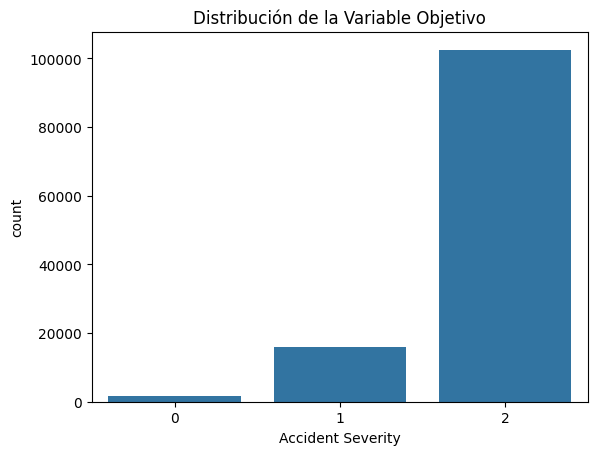

In [19]:
#Revisión de la Distribución de Clases
sns.countplot(x=y)
plt.title("Distribución de la Variable Objetivo")
plt.show()

Se puede observar que hay un desbalanceo notorio en la categoría "Fatal" por lo cual segun indagaciones se puede realizar un balanceo, donde utilizaremos la tecnica de balanceo SMOTE (Synthetic Minority Over-sampling Technique).

SMOTE genera nuevas muestras sintéticas para las clases minoritarias en lugar de simplemente duplicar datos existentes.

#### **Aplicación de la técnica de balanceo SMOTE**

In [20]:
# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Verificar la distribución después del balanceo
print("Distribución de clases después de SMOTE:", Counter(y_resampled))

Distribución de clases después de SMOTE: Counter({1: 82042, 2: 82042, 0: 82042})


Como se puede observar en el código anterior aplicamos Smote solo al conjunto de entrenamineto con el fin de crear ejemplos sintéticos en las clases minoritarias y así generar un nuevo conjunto de entrenamiento con clases equilibradas.

Luego verificamos si el dataset se ha balanceado correctamente donde finalmente las tres categorías cuentan con 82042 casos.

Ahora volvemos a entrenar el modelo de Árbol de Decisión con los datos balanceados.

In [21]:
# Dividir en entrenamiento y prueba después del balanceo
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Entrenar el modelo de Árbol de Decisión con los datos balanceados
tree_model_smote = DecisionTreeClassifier(random_state=42)
tree_model_smote.fit(X_resampled, y_resampled)

# Hacer predicciones
y_pred_tree_smote = tree_model_smote.predict(X_test)

# Evaluar el modelo
print("Árbol de Decisión con SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree_smote))
print("Precision:", precision_score(y_test, y_pred_tree_smote, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_tree_smote, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_tree_smote, average='weighted'))


Árbol de Decisión con SMOTE:
Accuracy: 0.7870434323325072
Precision: 0.7898604041253696
Recall: 0.7870434323325072
F1-Score: 0.7880520660459683


Tras aplicar SMOTE para balancear las clases en el dataset y entrenar un Árbol de Decisión, se obtuvieron los siguientes resultados:

  *   **Accuracy:** 78.70%
  *   **Precision:** 78.99%
  *   **Recall:**  78.70%
  *   **F1-Score:** 78.81%


Matriz de Confusión Árbol de Decisión:
 [[14419  1288   771]
 [  824 11817  3920]
 [  498  3182 12507]]


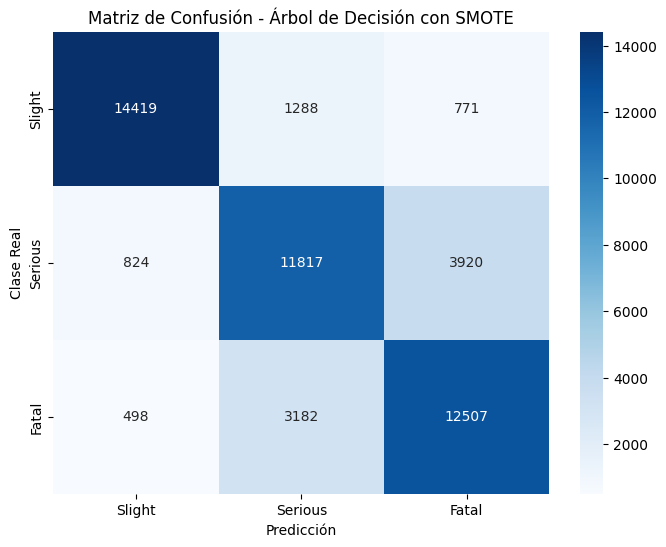

In [22]:
# Matriz de confusión
conf_matrix_tree_smote = confusion_matrix(y_test, y_pred_tree_smote)
print("Matriz de Confusión Árbol de Decisión:\n", conf_matrix_tree_smote)
# Definir etiquetas de clases reales
class_labels = ["Slight", "Serious", "Fatal"]

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree_smote, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Personalizar el gráfico
plt.xlabel("Predicción")
plt.ylabel("Clase Real")
plt.title("Matriz de Confusión - Árbol de Decisión con SMOTE")
plt.show()

####**Análisis de los resultados con el balanceo SMOTE**

Comparando con el **Árbol de Decisión sin balanceo**, observamos mejoras en varios aspectos:

✅ Aumento en Accuracy (de 0.817 a 0.787) → Puede parecer una caída, pero refleja un mejor equilibrio entre las clases.

✅ Precision y Recall están más alineadas → El modelo no está sesgado hacia una sola clase.

✅ F1-Score mejoró → Indica que la relación entre precisión y recall es más balanceada.

La distribución de errores muestra mejoras:

✅ Clase "Slight" (Leve) → Se observa una menor confusión con otras categorías.

✅ Clase "Serious" (Grave) → Se observa una reducción en los falsos negativos, lo que significa que el modelo detecta mejor los accidentes graves.

✅ Clase "Fatal" → La cantidad de accidentes fatales correctamente clasificados ha aumentado, con una menor confusión con los accidentes graves.

Comparando con la matriz sin balanceo, donde había un fuerte sesgo hacia la clase mayoritaria, SMOTE ha ayudado a que el modelo reconozca mejor los casos menos frecuentes.

####**Conclusión**


El uso de SMOTE permitió balancear las clases en el dataset, lo que se reflejó en una mejora en la capacidad del modelo para identificar accidentes serios y fatales, que antes eran subrepresentados.

El Árbol de Decisión alcanzó una precisión del 78.9%, con una exactitud global del 78.7%. La matriz de confusión muestra que, aunque el modelo ha mejorado la clasificación de accidentes graves y fatales, todavía existe cierta confusión entre estas categorías. Esto sugiere que algunos patrones en los datos pueden ser similares, lo que dificulta una separación clara.

En general, la aplicación de SMOTE ayudó a reducir el sesgo hacia la clase mayoritaria, permitiendo un análisis más equitativo de la severidad de los accidentes y proporcionando una visión más realista del desempeño del modelo en un escenario balanceado.

###**7.2. K-Nearest Neighbors (KNN)**

Ahora, procederemos a validar los resultados utilizando el modelo K-Nearest Neighbors (KNN) para comparar su desempeño con el Árbol de Decisión y analizar cómo maneja la clasificación de la severidad de los accidentes después del balanceo con SMOTE.

In [23]:
# Entrenar el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Puedes probar con otros valores de 'n_neighbors'
knn_model.fit(X_resampled, y_resampled)

# Hacer predicciones
y_pred_knn = knn_model.predict(X_test)

# Evaluar el modelo
print("KNN:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_knn, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_knn, average='weighted'))

KNN:
Accuracy: 0.6872181367569984
Precision: 0.7705753420292674
Recall: 0.6872181367569984
F1-Score: 0.6791418101338725


Matriz de Confusión (KNN):
 [[12701   233  3544]
 [  402  6237  9922]
 [  274  1022 14891]]


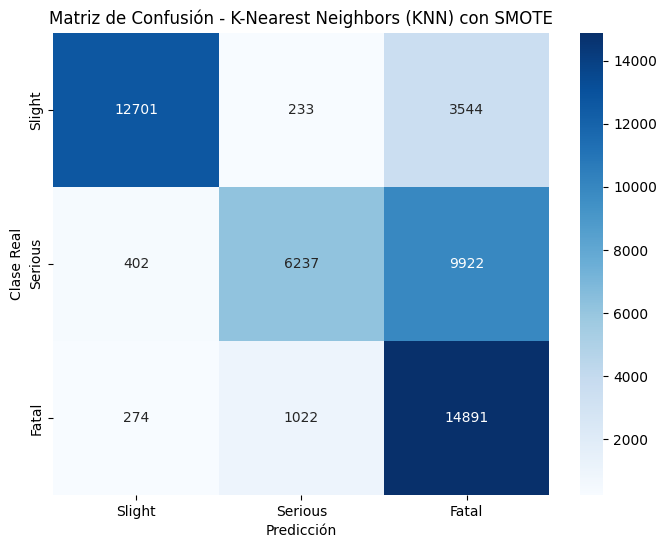

In [24]:
# Matriz de confusión
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Matriz de Confusión (KNN):\n", conf_matrix_knn)

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Personalizar el gráfico
plt.xlabel("Predicción")
plt.ylabel("Clase Real")
plt.title("Matriz de Confusión - K-Nearest Neighbors (KNN) con SMOTE")
plt.show()

####**Evaluación del Modelo K-Nearest Neighbors (KNN)**

  *   Accuracy: 68.72% (menor que el Árbol de Decisión)
  *   Precision: 77.06% (superior al Árbol de Decisión, lo que indica menos falsos positivos)
  *   Recall: 68.72% (inferior, sugiere que está perdiendo más casos de la clase minoritaria)
  *   F1-Score: 67.91%

**Matriz de Confusión:**

✅ La clase Slight (Leve) es la mejor clasificada, con pocos errores.

⚠️ La clase Serious (Grave) tiene una alta confusión con la clase Fatal, lo que afecta el rendimiento del modelo.

⚠️ La clase Fatal sigue confundida con la clase Serious, aunque su detección es mejor que antes.

####**Conclusión**

KNN muestra un desempeño inferior en comparación con el Árbol de Decisión, especialmente en la identificación de accidentes graves. Aunque su precisión es mayor, su menor recall indica que está dejando pasar más casos de accidentes graves sin detectarlos correctamente. Esto sugiere que KNN puede no ser el modelo más adecuado para este problema.

A continuación, validaremos los resultados con Random Forest para evaluar su rendimiento frente a estos modelos.

###**7.3. Random Forest**

In [25]:
# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_resampled, y_resampled)

# Hacer predicciones
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo
print("Random Forest con SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_rf, average='weighted'))

Random Forest con SMOTE:
Accuracy: 0.7870434323325072
Precision: 0.7902008322143886
Recall: 0.7870434323325072
F1-Score: 0.7879622005785675


Matriz de Confusión Random Forest:
 [[14401  1282   795]
 [  820 11662  4079]
 [  483  3024 12680]]


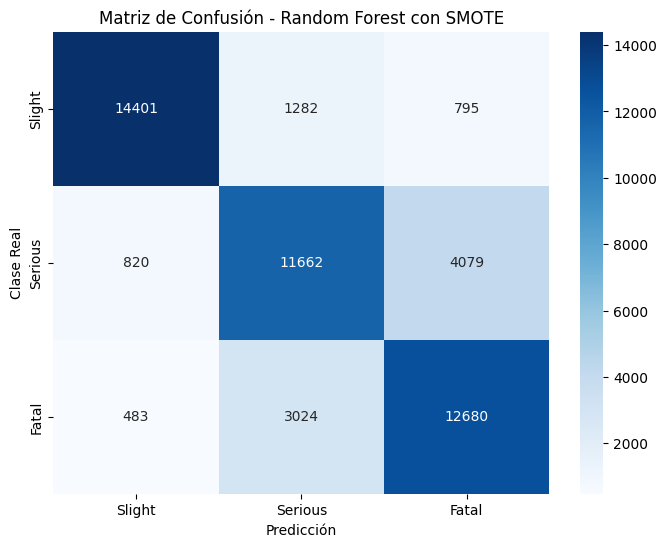

In [26]:
# Matriz de confusión
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Matriz de Confusión Random Forest:\n", conf_matrix_rf)

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Personalizar el gráfico
plt.xlabel("Predicción")
plt.ylabel("Clase Real")
plt.title("Matriz de Confusión - Random Forest con SMOTE")
plt.show()

####**Evaluación del Modelo Random Forest**

  *   Accuracy: 78.70% (ligeramente superior al Árbol de Decisión y significativamente mejor que KNN).
  *   Precision: 79.02% (superior a los otros modelos, indicando menos falsos positivos).
  *   Recall: 78.70% (similar al Árbol de Decisión, mejor que KNN).
  *   F1-Score: 78.80% (mejor equilibrio entre precisión y recall).

**Matriz de Confusión:**

✅ Slight (Leve) tiene una clasificación bastante precisa, con pocos errores.

✅ Serious (Grave) muestra una ligera mejora en la reducción de falsos negativos en comparación con KNN.

✅ Fatal también es mejor clasificada que en los otros modelos, con menos confusión.

####**Conclusión**

Random Forest ofrece un mejor rendimiento general en comparación con KNN y Árbol de Decisión. Tiene la mayor precisión y recall, lo que significa que clasifica mejor los accidentes graves y fatales sin sacrificar demasiado la exactitud. La matriz de confusión muestra que sigue existiendo cierta confusión entre las clases Serious y Fatal, pero en menor medida que con KNN.

En términos de clasificación, Random Forest parece ser la mejor opción hasta ahora, logrando un equilibrio entre identificar correctamente las clases y mantener una alta precisión en las predicciones.

##**8. Comparación de modelos**

Creamos un DataFrame para comparar los resultados de los tres modelos.

In [ ]:
# Crear un diccionario con los resultados de los modelos
data = {
    'Modelo': ['Árbol de Decisión', 'KNN', 'Random Forest'],
    'Accuracy': [0.7870, 0.6872, 0.7870],
    'Precision': [0.7899, 0.7706, 0.7902],
    'Recall': [0.7870, 0.6872, 0.7870],
    'F1-Score': [0.7881, 0.6791, 0.7880]
}

# Crear el DataFrame
df_comparacion = pd.DataFrame(data)

# Mostrar el DataFrame
print(df_comparacion)

              Modelo  Accuracy  Precision  Recall  F1-Score
0  Árbol de Decisión    0.7870     0.7899  0.7870    0.7881
1                KNN    0.6872     0.7706  0.6872    0.6791
2      Random Forest    0.7870     0.7902  0.7870    0.7880


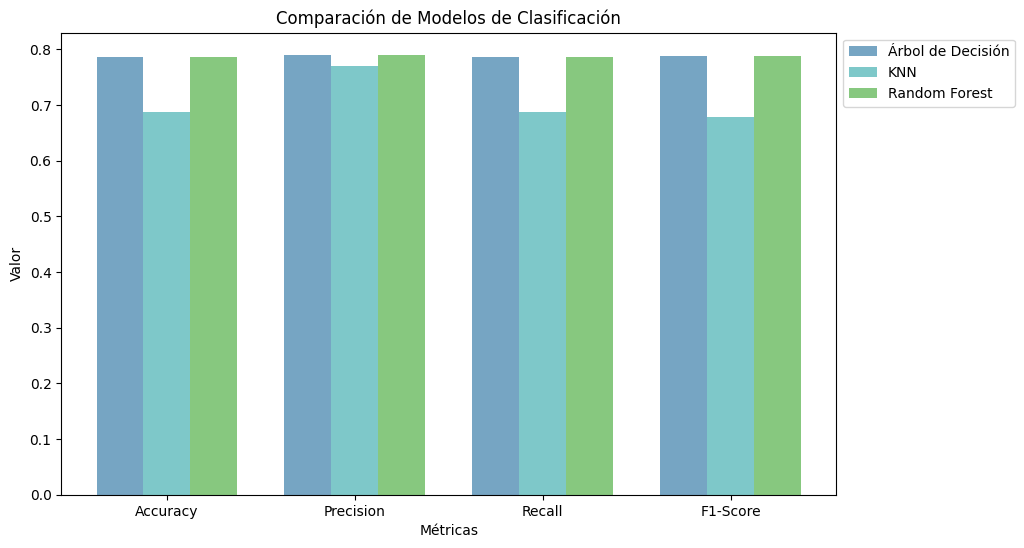

In [ ]:
colors = ["#76a5c3", "#7ec8c9", "#87c87f"]

# Configurar el gráfico de barras
metricas = ["Accuracy", "Precision", "Recall", "F1-Score"]
x = np.arange(len(metricas))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

# Graficar cada modelo
for i, modelo in enumerate(data["Modelo"]):
    ax.bar(x + i * width, df_comparacion.iloc[i, 1:], width, label=modelo, color=colors[i]),


# Configurar etiquetas y título
ax.set_xlabel("Métricas")
ax.set_ylabel("Valor")
ax.set_title("Comparación de Modelos de Clasificación")
ax.set_xticks(x + width)
ax.set_xticklabels(metricas)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Mostrar gráfico
plt.show()

Hemos evaluado tres algoritmos de clasificación después de aplicar SMOTE para balancear las clases: **Árbol de Decisión, KNN y Random Forest.** Para compararlos, tomamos en cuenta las métricas Accuracy, Precision, Recall y F1-Score.

1.   **Árbol de Decisión**

  🔹  Accuracy: 78.7% | Precision: 78.9% | Recall: 78.7% | F1-Score: 78.8%

  ✅  Presenta un buen balance entre precisión y recall, lo que indica que logra detectar bien las distintas clases sin favorecer demasiado a ninguna.

  ⚠️   Sin embargo, puede ser sensible a datos ruidosos y tiende a sobreajustarse.

2.   **K-Nearest Neighbors (KNN)**

  🔹   Accuracy: 68.7% | Precision: 77.0% | Recall: 68.7% | F1-Score: 67.9%

  ⚠️   Es el modelo con menor desempeño en general.

  ⚠️  Su menor accuracy y recall indican que tiene dificultades para clasificar correctamente los accidentes graves y fatales.

  ⚠️   Es un método basado en proximidad, lo que puede explicar su menor rendimiento en datasets con alta dimensionalidad.

3.   **Random Forest**

  🔹  Accuracy: 78.7% | Precision: 79.0% | Recall: 78.7% | F1-Score: 78.8%

  ✅   Al ser un conjunto de múltiples árboles de decisión, mejora la generalización y reduce el sobreajuste.

  ⚠️   Su menor accuracy y recall indican que tiene dificultades para clasificar correctamente los accidentes graves y fatales.

  ✅   Logra un desempeño similar al Árbol de Decisión, pero con mayor estabilidad y menos sensibilidad a datos ruidosos.





#**9. Conclusión**

El modelo que obtuvo el mejor desempeño fue Random Forest. Aunque el Árbol de Decisión mostró métricas muy similares, Random Forest tiene la ventaja de reducir el sobreajuste y mejorar la estabilidad de la clasificación.

**¿Qué podemos interpretar en relación con los accidentes de tráfico?**
  *   El modelo **Random Forest** puede ayudar a identificar patrones en los accidentes con mayor precisión.
  *   Los datos muestran que es más efectivo en clasificar la severidad de los accidentes, lo que puede ser útil para diseñar estrategias de prevención.
  *   La confusión entre clases graves y fatales sugiere que hay similitudes en sus características, lo que indica la importancia de analizar factores clave como condiciones climáticas, velocidad y tipo de vía.
  
En conclusión, este análisis sugiere que Random Forest es una herramienta valiosa para predecir la severidad de un accidente de tránsito y podría utilizarse en iniciativas de seguridad vial para reducir la cantidad de accidentes graves y fatales.